# Profitable App Profiles for the App Store and Google Play Markets

Our aim in this project is to find mobile app profiles that are profitable for the App Store and Google Play markets. The research may enable developers to make data-driven decisions with respect to the kind of apps they build.

At our company, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. This means that our revenue for any given app is mostly influenced by the number of users that use our app. Our goal for this project is to analyze data to help our developers understand what kinds of apps are likely to attract more users.

In the previous step, we outlined that our aim is to help our developers understand what type of apps are likely to attract more users on Google Play and the App Store. To do this, we'll need to collect and analyze data about mobile apps available on Google Play and the App Store.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play. (Source:
<a href="https://www.statista.com/statistics/276623/number-of-apps-available-in-leading-app-stores/">Statista</a>)

In [10]:
apps = {'Number' : pd.Series(data = [2.1, 2.0, 0.669, 0.450, 0.2345], index = ['Google Play', 'Apple App Store', 'Windows Store', 'Amazon Appstore', 'BlackBerry World'])}
number_of_apps = pd.DataFrame(apps)
print(number_of_apps)

                  Number
Google Play       2.1000
Apple App Store   2.0000
Windows Store     0.6690
Amazon Appstore   0.4500
BlackBerry World  0.2345


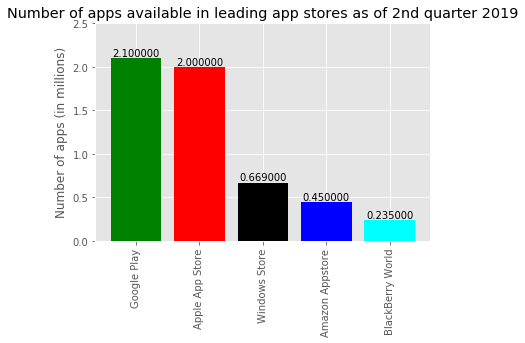

In [20]:
import matplotlib.pyplot as plt
x = ['Google Play', 'Apple App Store', 'Windows Store', 'Amazon Appstore', 'BlackBerry World']
height = [2.1, 2, 0.669, 0.45, 0.235]
x_pos = [i for i, _ in enumerate(x)]

fig, ax = plt.subplots()
ax.set(ylim=(0, 2.5))
rects1 = plt.bar(x_pos, height, color=['green', 'red', 'black', 'blue', 'cyan'])
plt.ylabel("Number of apps (in millions)")
plt.title("Number of apps available in leading app stores as of 2nd quarter 2019")

plt.xticks(x_pos, x, rotation=90)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height-.00002,
                '%f' % float(round(height,3)),
        ha='center', va='bottom')
autolabel(rects1)

plt.show()


Collecting data for over 4 million apps requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we should first try to see if we can find any relevant existing data at no cost. Luckily, these are two data sets that seem suitable for our goals:

*  <a href="https://www.kaggle.com/lava18/google-play-store-apps/home">A data set</a> containing data about approximately 10,000 Android apps from Google Play; the data was collected in August 2018.
*  <a href="https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home">A data set </a>containing data about approximately 7,000 iOS apps from the App Store; the data was collected in July 2017.

Let's open these two datasets:

In [1]:
import pandas as pd
import numpy as np

In [3]:
applestore = pd.read_csv('AppleStore.csv')
applestore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
googleplaystore = pd.read_csv('googleplaystore.csv')
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [30]:
print('Number of apps in Apple store: {}'.format(applestore.shape[0]))
print('Number of apps in Google store: {}'.format(googleplaystore.shape[0]))


Number of apps in Apple store: 7197
Number of apps in Google store: 10841


## Data cleaning

#### Delete errors:

The Google Play data set has a dedicated discussion section, and we can see that <a href = "https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015">one of the discussions </a>outlines an error for row 10472. Let's print this row and compare it against the header and another row that is correct.

In [34]:
print(googleplaystore.loc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object



The row 10472 corresponds to the app Life Made WI-Fi Touchscreen Photo Frame, and we can see that the rating is 19. This is clearly off because the maximum rating for a Google Play app is 5. As a consequence, we'll delete this row.

In [35]:
googleplaystore.drop(googleplaystore.index[10472], inplace=True)

#### Delete duplicates:

Apart from this we don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. Currently there are 1181 duplicated apps in Google Store and only 2 apps in App Store. 

In [52]:
google_unique = googleplaystore['App'].nunique()
google_duplicated = len(googleplaystore) - google_unique

apple_unique = applestore['track_name'].nunique()
apple_duplicated = len(applestore) - apple_unique

print('Number of unique Google apps:', google_unique)
print('Number of duplicated Google apps:', google_duplicated)
print('Number of unique Apple apps:', apple_unique)
print('Number of duplicated Apple apps:', apple_duplicated)

Number of unique Google apps: 9659
Number of duplicated Google apps: 1181
Number of unique Apple apps: 7195
Number of duplicated Apple apps: 2


We use the criteria of keeping the most recent datas only. To do this we keep the row with the highest number of reviews (since that must be the most recent entry) and remove the other entries for any given app.

First, convert every values to float in Reviews column:

In [68]:
googleplaystore['Reviews'] = googleplaystore['Reviews'].astype(float)

Sort the dataset by Reviews in descending order:

In [78]:
cleaned_googleplay = googleplaystore.sort_values(by=['Reviews'], ascending=False)
cleaned_googleplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [80]:
cleaned_googleplay = cleaned_googleplay.drop_duplicates(subset='App', keep='first')

In [82]:
cleaned_googleplay.head()
                                                       

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888.0,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


##### Perform the same process on Apple Store dataset:

In [84]:
# Order the dataset by rating_count_tot:
cleaned_applestore = applestore.sort_values(by=['rating_count_tot'], ascending=False)
cleaned_applestore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
519,591,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
1346,1561,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
707,810,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [89]:
cleaned_applestore.drop_duplicates(subset='track_name', keep='first')
cleaned_applestore.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
16,17,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
519,591,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
1346,1561,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
707,810,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


#### Delete non-english apps

Both data sets have apps with names that suggest they are not directed toward an English-speaking audience. We're not interested in keeping these apps, so we'll remove them.

Behind the scenes, each character we use in a string has a corresponding number associated with it. For instance, the corresponding number for character 'a' is 97, character 'A' is 65, and character '爱' is 29,233. We can get the corresponding number of each character using the ord() built-in function.

The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the ASCII (American Standard Code for Information Interchange) system. Based on this number range, we can detect whether a character belongs to the set of common English characters or not. If the number is equal to or less than 127, then the character belongs to the set of common English characters.

To minimize the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters:

In [94]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
True
False


In [95]:
is_android_english = cleaned_googleplay['App'].apply(is_english)
only_english_android = cleaned_googleplay[is_android_english]


(9614, 13)


In [96]:
is_apple_english = cleaned_applestore['track_name'].apply(is_english)
only_english_apple = cleaned_applestore[is_apple_english]

In [97]:
print('Only english android apps: {}'.format(only_english_android.shape[0]))
print('Only english apple apps: {}'.format(only_english_apple.shape[0]))


Only english android apps: 9614
Only english apple apps: 6183


We can see that we're left with 9614 Android-, and 6183 iOS apps made only for english speaking audience.

#### Isolating free apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [98]:
final_android_apps = only_english_android.query("Type == 'Free'")
print(final_android_apps.shape[0])

8863


In [99]:
final_apple_apps = only_english_apple.query("price == '0'")
print(final_apple_apps.shape[0])

3222


From the free english apps there are 8863 in the Android Store and there are 3222 in the Apple Store, which should be enough for analysis. 

## Most common apps by genre

As we mentioned in the introduction, our aim is to determine the kinds of apps that are likely to attract more users because our revenue is highly influenced by the number of people using our apps.

To minimize risks and overhead, our validation strategy for an app idea is comprised of three steps:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by getting a sense of what are the most common genres for each market. 

#### 1. Most common genres in the Apple Store:

In [135]:
grouped_ios = final_apple_apps.groupby(['prime_genre'])['track_name'].size().reset_index()
grouped_ios.columns = ['Category', 'Number of Apps']
grouped_ios.head()

,Category,Number of Apps
0,Book,14
1,Business,17
2,Catalogs,4
3,Education,118
4,Entertainment,254


In [136]:
summary_grouped_ios = grouped_ios['Number of Apps'].agg(['sum'])
print(summary_grouped_ios)

sum    3222
Name: Number of Apps, dtype: int64


In [138]:
grouped_ios['percentages'] = (grouped_ios['Number of Apps'] / float(summary_grouped_ios)) * 100
grouped_ios = grouped_ios.sort_values(by=['percentages'], ascending=False)
grouped_ios.head()

,Category,Number of Apps,percentages
7,Games,1874,58.162632
4,Entertainment,254,7.883302
14,Photo & Video,160,4.965860
3,Education,118,3.662322
18,Social Networking,106,3.289882


We can see that among the free English apps, more than a half (58.16%) are games. Entertainment apps are close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for 3.29% of the apps in our data set.

The general impression is that App Store (at least the part containing free English apps) is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

Let's continue by examining the Genres and Category columns of the Google Play data set.

#### 2. Most common genres in the Google Store:

In [133]:
grouped_android = final_android_apps.groupby(['Category'])['App'].size().reset_index()
grouped_android.columns = ['Category', 'Number of Apps']
grouped_android.head()

,Category,Number of Apps
0,ART_AND_DESIGN,57
1,AUTO_AND_VEHICLES,82
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,190
4,BUSINESS,407


In [132]:
summary_grouped_android = grouped_android['App'].agg(['sum'])
print(summary_grouped_android)

sum    8863
Name: App, dtype: int64


In [139]:
grouped_android['percentages'] = (grouped_android['Number of Apps'] / float(summary_grouped_android)) * 100
grouped_android = grouped_android.sort_values(by=['percentages'], ascending=False)
grouped_android.head()

,Category,Number of Apps,percentages
11,FAMILY,1676,18.910076
14,GAME,861,9.714544
29,TOOLS,750,8.462146
4,BUSINESS,407,4.592125
18,LIFESTYLE,346,3.903870


The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.

Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [141]:
grouped_android_by_genres = final_android_apps.groupby(['Genres'])['App'].size().reset_index()
grouped_android_by_genres.columns = ['Genres', 'Number of Apps']
summary_grouped_android_by_genres = grouped_android_by_genres['Number of Apps'].agg(['sum'])
grouped_android_by_genres['Percentages'] = (grouped_android_by_genres['Number of Apps'] / float(summary_grouped_android_by_genres)) * 100
grouped_android_by_genres = grouped_android_by_genres.sort_values(by=['Percentages'], ascending=False)
grouped_android_by_genres

,Genres,Number of Apps,Percentages
103,Tools,749,8.450863
48,Entertainment,538,6.070179
35,Education,474,5.348076
19,Business,407,4.592125
63,Lifestyle,345,3.892587
78,Productivity,345,3.892587
56,Finance,328,3.700779
67,Medical,313,3.531536
97,Sports,307,3.463838
76,Personalization,294,3.317161


The difference between the Genres and the Category columns is not crystal clear, but one thing we can notice is that the Genres column is much more granular (it has more categories). We're only looking for the bigger picture at the moment, so we'll only work with the Category column moving forward.

Up to this point, we found that the App Store is dominated by apps designed for fun, while Google Play shows a more balanced landscape of both practical and for-fun apps. Now we'd like to get an idea about the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

Below, we calculate the average number of user ratings per app genre on the App Store:

In [148]:
popular_ios_genres = final_apple_apps.groupby(['prime_genre'])['rating_count_tot'].mean().reset_index()
popular_ios_genres = popular_ios_genres.sort_values(by=['rating_count_tot'], ascending=False)
popular_ios_genres.head()

,prime_genre,rating_count_tot
12,Navigation,86090.333333
16,Reference,74942.111111
18,Social Networking,71548.349057
11,Music,57326.530303
22,Weather,52279.892857


On average, navigation apps have the highest number of user reviews, but this figure is heavily influenced by Waze and Google Maps, which have close to half a million user reviews together:

In [158]:
navigation_ios = final_apple_apps.query("prime_genre == 'Navigation'")
navigation_ios = navigation_ios[['track_name', 'prime_genre', 'rating_count_tot']].set_index('track_name')
navigation_ios

,prime_genre,rating_count_tot
track_name,,
"Waze - GPS Navigation, Maps & Real-time Traffic",Navigation,345046
Google Maps - Navigation & Transit,Navigation,154911
Geocaching®,Navigation,12811
CoPilot GPS – Car Navigation & Offline Maps,Navigation,3582
ImmobilienScout24: Real Estate Search in Germany,Navigation,187
Railway Route Search,Navigation,5


The same pattern applies to social networking apps, where the average number is heavily influenced by a few giants like Facebook, Pinterest, Skype, etc. Same applies to music apps, where a few big players like Pandora, Spotify, and Shazam heavily influence the average number.

Our aim is to find popular genres, but navigation, social networking or music apps might seem more popular than they really are. The average number of ratings seem to be skewed by very few apps which have hundreds of thousands of user ratings, while the other apps may struggle to get past the 10,000 threshold.

## Conclusion


In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.